## Reto 4: Curva ROC / AUC

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una curva ROC / AUC.
    
---
    
### 2. Desarrollo:

Ahora, vamos a evaluar nuestro mismo modelo utilizando una curva ROC / AUC. Tu Reto consiste en lo siguiente:

1. Copia el código del Reto anterior a este Reto, de manera que tengas un modelo entrenado que sea similar.
2. Esta vez, realiza las clasificaciones de tu dataset de prueba de manera que obtengas probabilidades en vez de resultados binarios.
3. Obtén la proporción de Verdaderos Positivos y de Falsos Positivos utilizando el método `roc_curve` de `sklearn.metrics`.
4. Obtén el valor de AUC usando el método `auc` de `sklearn.metrics`.
5. Grafica tu curva ROC / AUC para visualizar el desempeño de tu modelo.

> **Reto extra**: Para un reto extra, obtén las series de proporciones de Verdaderos Positivos y de Falsos Positivos sin utilizar los métodos de `sklearn`. Esto es un reto bastante difícil, pero si te interesa practicar tus habilidades al máximo, pídele a la experta que te ayude a entender cómo lograr esto.

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../Datasets/diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df2 = df[df["skin_thickness"] < 70]
df2 = df2[df2["age"] < 70]
df2 = df2.drop(columns = "pregnancies")
df2 = df2.drop(columns = "age")

In [3]:
x = df.drop(columns= "outcome")
y = df["outcome"]

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [9]:
logreg.score(X_test, y_test)

0.7705627705627706

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[139  19]
 [ 34  39]]


En esta matriz, cada vector tiene dos valores. El primer valor es la probabilidad de que el valor sea negativo. El segundo valor es la probabilidad de que el valor sea positivo. Necesitamos los resultados de esta manera para poder modificar el umbral y obtener los puntos necesarios para generar la curva ROC.

In [16]:
y_pred_proba = logreg.predict_proba(X_test)

In [17]:
from sklearn.metrics import roc_curve, auc

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

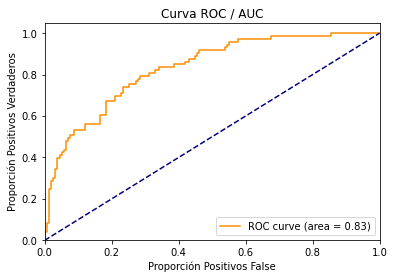

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()